In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import twixtools
from utils import *

# Reading all files from kspace directory. 
We want to find all '.dat' files under the directory path. Also we want to filter files to keep only the scans we need.

In [41]:
ksp_dir = "/home/orel/Downloads/kspace"
ksp_files = find_dat_files(ksp_dir)

ksp_files = [f for f in ksp_files if "Adj" not in f and "Anatomy" not in f]
ksp_files

['/home/orel/Downloads/kspace/SER00006/UNWRAP/meas_MID00151_FID04788_t1_se_sag_Phase_Resolusion_50%.dat',
 '/home/orel/Downloads/kspace/SER00003/UNWRAP/meas_MID00148_FID04785_t1_se_sag.dat',
 '/home/orel/Downloads/kspace/SER00005/UNWRAP/meas_MID00150_FID04787_t1_se_sag_fov_phase_50%.dat',
 '/home/orel/Downloads/kspace/SER00013/UNWRAP/meas_MID00159_FID04796_t1_se_sag_fov_phase_21.9%.dat']

In [42]:
phase_res_50 = ksp_files[0]
fully_sampled = ksp_files[1]
phase_fov_50 = ksp_files[2]
phase_fov_21_9 = ksp_files[3]

# Reconstruction of 2D kspace
Now we will use the function 'read_raw_twix_data' to read the '.dat' file and return an image. We will repeat the process for each one of the scans above

         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 1.80GB/s]


Scan  1


100%|██████████| 1.70G/1.70G [00:00<00:00, 2.51GB/s]


Dimensions: ['Sli', 'Lin', 'Cha', 'Col']


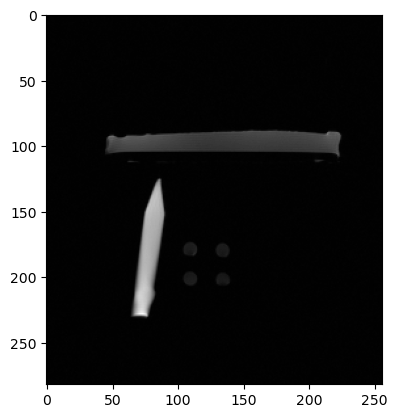

In [43]:
################## FULLY SAMPLED RECONSTRUCTION ###########################
images, _ =  read_raw_twix_data(fully_sampled)

slice_to_plot = 20
plt.figure()
plt.imshow(abs(images[slice_to_plot]), cmap="gray")

         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 114M/114M [00:00<00:00, 986MB/s]  


Scan  1


100%|██████████| 781M/781M [00:00<00:00, 2.23GB/s]


Dimensions: ['Sli', 'Lin', 'Cha', 'Col']


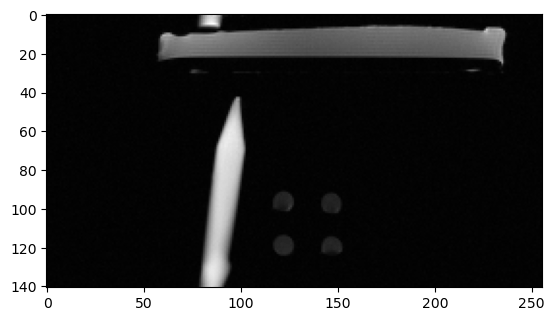

In [44]:
################## 50% PHASE FOV RECONSTRUCTION ###########################
images, _ =  read_raw_twix_data(phase_fov_50)

slice_to_plot = 20
plt.figure()
plt.imshow(abs(images[slice_to_plot]), cmap="gray")

         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 1.80GB/s]


Scan  1


100%|██████████| 383M/383M [00:00<00:00, 1.97GB/s]


Dimensions: ['Sli', 'Lin', 'Cha', 'Col']


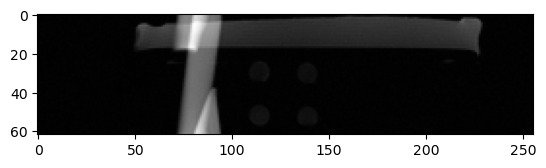

In [45]:
################## 21.9% PHASE FOV RECONSTRUCTION ###########################
images, _ =  read_raw_twix_data(phase_fov_21_9)

slice_to_plot = 20
plt.figure()
plt.imshow(abs(images[slice_to_plot]), cmap="gray")

         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 1.78GB/s]


Scan  1


100%|██████████| 871M/871M [00:00<00:00, 2.26GB/s]


Dimensions: ['Sli', 'Lin', 'Cha', 'Col']


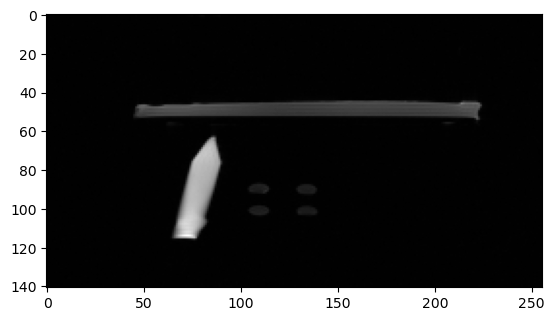

In [46]:
################## 50% PHASE RESOLUTION RECONSTRUCTION ###########################
images, _ =  read_raw_twix_data(phase_res_50)

slice_to_plot = 20
plt.figure()
plt.imshow(abs(images[slice_to_plot]), cmap="gray")

# Reading Headers and Metadata
Lets look at an example of reading the metadata from each scan

In [47]:

for f in ksp_files:
    twix = twixtools.read_twix(f,  keep_syncdata_and_acqend=True)
    last_measurement = twix[-1]
    print(f"{f} ReadFoV - {last_measurement['hdr']['Config']['ReadFoV']}")
    print(f"{f} PhaseFoV - {last_measurement['hdr']['Config']['PhaseFoV']}")
    print(f"{f} PhaseResolution - {last_measurement['hdr']['Config']['PhaseResolution']}")

         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 1.03GB/s]


Scan  1


100%|██████████| 871M/871M [00:00<00:00, 2.53GB/s]


/home/orel/Downloads/kspace/SER00006/UNWRAP/meas_MID00151_FID04788_t1_se_sag_Phase_Resolusion_50%.dat ReadFoV - 220.0
/home/orel/Downloads/kspace/SER00006/UNWRAP/meas_MID00151_FID04788_t1_se_sag_Phase_Resolusion_50%.dat PhaseFoV - 220.0
/home/orel/Downloads/kspace/SER00006/UNWRAP/meas_MID00151_FID04788_t1_se_sag_Phase_Resolusion_50%.dat PhaseResolution - 0.5
         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 932MB/s] 


Scan  1


100%|██████████| 1.70G/1.70G [00:00<00:00, 2.65GB/s]


/home/orel/Downloads/kspace/SER00003/UNWRAP/meas_MID00148_FID04785_t1_se_sag.dat ReadFoV - 220.0
/home/orel/Downloads/kspace/SER00003/UNWRAP/meas_MID00148_FID04785_t1_se_sag.dat PhaseFoV - 220.0
/home/orel/Downloads/kspace/SER00003/UNWRAP/meas_MID00148_FID04785_t1_se_sag.dat PhaseResolution - 1.0
         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 114M/114M [00:00<00:00, 1.73GB/s]


Scan  1


100%|██████████| 781M/781M [00:00<00:00, 2.45GB/s]


/home/orel/Downloads/kspace/SER00005/UNWRAP/meas_MID00150_FID04787_t1_se_sag_fov_phase_50%.dat ReadFoV - 220.0
/home/orel/Downloads/kspace/SER00005/UNWRAP/meas_MID00150_FID04787_t1_se_sag_fov_phase_50%.dat PhaseFoV - 110.0
/home/orel/Downloads/kspace/SER00005/UNWRAP/meas_MID00150_FID04787_t1_se_sag_fov_phase_50%.dat PhaseResolution - 1.0
         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 903MB/s]


Scan  1


100%|██████████| 383M/383M [00:00<00:00, 3.01GB/s]

/home/orel/Downloads/kspace/SER00013/UNWRAP/meas_MID00159_FID04796_t1_se_sag_fov_phase_21.9%.dat ReadFoV - 220.0
/home/orel/Downloads/kspace/SER00013/UNWRAP/meas_MID00159_FID04796_t1_se_sag_fov_phase_21.9%.dat PhaseFoV - 48.125
/home/orel/Downloads/kspace/SER00013/UNWRAP/meas_MID00159_FID04796_t1_se_sag_fov_phase_21.9%.dat PhaseResolution - 1.0


In [48]:
twix = twixtools.read_twix(ksp_files[3],  keep_syncdata_and_acqend=True)

# Access measurement data
last_measurement = twix[-1]
measurement_data_blocks = last_measurement['mdb']
for k,v in last_measurement.items():
    print(k)

for k in last_measurement['hdr']:
    print(k)
for k in last_measurement['raidfile_hdr']:
    print(k)
print(last_measurement['geometry'])

         Setting keep_syncdata and keep_acqend to {True}.
Software version: VD/VE (!?)

Scan  0


100%|██████████| 127M/127M [00:00<00:00, 973MB/s] 


Scan  1


100%|██████████| 383M/383M [00:00<00:00, 3.43GB/s]

mdb
hdr
hdr_str
raidfile_hdr
geometry
pmu
Config
Config_raw
Dicom
Dicom_raw
Meas
Meas_raw
MeasYaps
MeasYaps_raw
Phoenix
Phoenix_raw
Protocol
Protocol_raw
Spice
Spice_raw
159
4796
133999616
402795296
b'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
b't1_se_sag_Phase Resolusion 50%'
Geometry:
  inplane_rot: 0
  normal: [0.995933, -0.089948, -0.005106]
  offset: [-87.2521970646, -12.0351531306, 7.63856111406]
  patient_position: HFS
  rotmatrix: [[-0.005106, -0.089948, -0.9959333735451039], [-0.00023010516284865276, 0.9959464357250469, -0.089948], [0.9999869378200571, -0.00023010516284865276, -0.005106]]
  voxelsize: [0.859375, 0.7762096774193549, 4.0]
